In [1]:
import pandas as pd
import numpy as np
from scipy.stats import mode
import random

# import libraries for applying machine learning models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# import library for plotting charts
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# read dataframe
df = pd.read_csv('wine.csv')
# split dataframe into training and testing set
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.3)

In [2]:
# checking the dataset
# df.head()

# Part 1

In [3]:
## (a)
def get_pred_logreg(train, test):
    # get dummy variables for categorical and object type values in columns
    train = pd.get_dummies(train, drop_first = True)
    test = pd.get_dummies(test, drop_first = True)
    
    # check to see if train and test data is Series or DataFrame object
    if isinstance(train, pd.DataFrame):
        X_train = train.iloc[:, :-1].values # get X train data by getting all the columns except last
        X_test = test.iloc[:, :-1].values # get X test data by getting all the columns except last
        y_train = train.iloc[:, -1].values # get y train data by getting only the last column
        y_test = test.iloc[:, -1].values # get y test data by getting only the last column
    else:
        X_train = train[:, :-1] # get X train data by getting all the columns except last
        X_test = test[:, :-1] # get X test data by getting all the columns except last
        y_train = train[:, -1] # get y train data by getting only the last column
        y_test = test[:, -1] # get y test data by getting only the last column
    
    regressor = LogisticRegression()
    regressor.fit(X_train, y_train) # fit regressor model on training data`
    y_pred_proba = regressor.predict_proba(X_test)[:,0] # predict y values using X test data and fitting the trained regressor model
    
    dataFrame_out = pd.DataFrame(data = y_pred_proba, columns = ['Prediction_Output_of_0'])
    dataFrame_out['Actual_Output'] = y_test
    
    return dataFrame_out

In [4]:
# Test the logreg function
# func = get_pred_logreg(train, test)
# func.head()

In [5]:
# (b)
def get_pred_svm(train, test):
    # get dummy variables for categorical and object type values in columns
    train = pd.get_dummies(train, drop_first = True)
    test = pd.get_dummies(test, drop_first = True)
    
    # check to see if train and test data is Series or DataFrame object
    if isinstance(train, pd.DataFrame):
        X_train = train.iloc[:, :-1].values # get X train data by getting all the columns except last
        X_test = test.iloc[:, :-1].values # get X test data by getting all the columns except last
        y_train = train.iloc[:, -1].values # get y train data by getting only the last column
        y_test = test.iloc[:, -1].values # get y test data by getting only the last column
    else:
        X_train = train[:, :-1] # get X train data by getting all the columns except last
        X_test = test[:, :-1] # get X test data by getting all the columns except last
        y_train = train[:, -1] # get y train data by getting only the last column
        y_test = test[:, -1] # get y test data by getting only the last column
    
    classifier = SVC(kernel = 'rbf', random_state = 0, probability = True)

    classifier.fit(X_train, y_train) # fit regressor model on training data`
    y_pred_proba = classifier.predict_proba(X_test)[:,0] # predict y values using X test data and fitting the trained regressor model
    
    dataFrame_out = pd.DataFrame(data = y_pred_proba, columns = ['Prediction_Output_of_0'])
    dataFrame_out['Actual_Output'] = y_test
    
    return dataFrame_out

In [6]:
# Test the svm function
# func = get_pred_svm(train, test)
# func.head()

In [7]:
# (c)
def get_pred_nb(train, test):
    # get dummy variables for categorical and object type values in columns
    train = pd.get_dummies(train, drop_first = True)
    test = pd.get_dummies(test, drop_first = True)    

    # check to see if train and test data is Series or DataFrame object
    if isinstance(train, pd.DataFrame):
        X_train = train.iloc[:, :-1].values # get X train data by getting all the columns except last
        X_test = test.iloc[:, :-1].values # get X test data by getting all the columns except last
        y_train = train.iloc[:, -1].values # get y train data by getting only the last column
        y_test = test.iloc[:, -1].values # get y test data by getting only the last column
    else:
        X_train = train[:, :-1] # get X train data by getting all the columns except last
        X_test = test[:, :-1] # get X test data by getting all the columns except last
        y_train = train[:, -1] # get y train data by getting only the last column
        y_test = test[:, -1] # get y test data by getting only the last column
    
    classifier = GaussianNB()
    classifier.fit(X_train, y_train) # fit regressor model on training data`

    y_pred_proba = classifier.predict_proba(X_test)[:,0] # predict y values using X test data and fitting the trained regressor model
    
    dataFrame_out = pd.DataFrame(data = y_pred_proba, columns = ['Prediction_Output_of_0'])
    dataFrame_out['Actual_Output'] = y_test
    
    return dataFrame_out

In [8]:
# Test the nb function
# func = get_pred_nb(train, test)
# func.head()

In [9]:
# (d)
def get_pred_knn(train, test, k):
    # get dummy variables for categorical and object type values in columns
    train = pd.get_dummies(train, drop_first = True)
    test = pd.get_dummies(test, drop_first = True)
    
    # check to see if train and test data is Series or DataFrame object
    if isinstance(train, pd.DataFrame):
        X_train = train.iloc[:, :-1].values # get X train data by getting all the columns except last
        X_test = test.iloc[:, :-1].values # get X test data by getting all the columns except last
        y_train = train.iloc[:, -1].values # get y train data by getting only the last column
        y_test = test.iloc[:, -1].values # get y test data by getting only the last column
    else:
        X_train = train[:, :-1] # get X train data by getting all the columns except last
        X_test = test[:, :-1] # get X test data by getting all the columns except last
        y_train = train[:, -1] # get y train data by getting only the last column
        y_test = test[:, -1] # get y test data by getting only the last column
    
    classifier = KNeighborsClassifier(n_neighbors = k, weights = 'uniform')
    classifier.fit(X_train, y_train) # fit regressor model on training data`

    y_pred_proba = classifier.predict_proba(X_test)[:,0] # predict y values using X test data and fitting the trained regressor model
    
    dataFrame_out = pd.DataFrame(data = y_pred_proba, columns = ['Prediction_Output_of_0'])
    dataFrame_out['Actual_Output'] = y_test
    
    return dataFrame_out

In [10]:
# Test the knn function
#func = get_pred_knn(train, test, 3)
#func.head()

# Part 2

In [11]:
def do_cv_class(df, num_folds, model_name):
    # get dummy variables for categorical and object type values in columns
    df = pd.get_dummies(df, drop_first = True)
    
    # create an empty dataFrame for the return
    resultingDataFrame = pd.DataFrame(columns=['Prediction_Output_of_0', 'Actual_Output', 'Fold']) 
    # generate random uniqe numbers in a range
    listOfRandomNumber = random.sample(range(0, len(df.index)), len(df.index))
    # create a column giving random number to each row in dataset
    df['Rand_Index'] = listOfRandomNumber
    # sort the dataset based on random index for train and test split
    dataFrametestSorted = df.sort_values('Rand_Index', ascending=False)

    # create data blocks for applying the k fold cross validation
    evenSets = round(len(dataFrametestSorted.index) / num_folds)
    oddSet = len(dataFrametestSorted.index) - ((evenSets * (num_folds - 1)))

    start = 0;
    stop = oddSet
    # create a loop to apply cross validation and store results
    for counter in range(num_folds):
        test = dataFrametestSorted.iloc[start:stop, :-1]
        train = dataFrametestSorted[~dataFrametestSorted.index.isin(test.index)]
        train = train.iloc[:, :-1]
        if (model_name == 'logreg'):
                modelOutput = get_pred_logreg(train, test)
                modelOutput['Fold'] = counter + 1
                resultingDataFrame = resultingDataFrame.append(other = modelOutput)            
        elif (model_name == 'svm'):
                modelOutput = get_pred_svm(train, test)
                modelOutput['Fold'] = counter + 1
                resultingDataFrame = resultingDataFrame.append(other = modelOutput)
                counter += 1            
        elif (model_name == 'nb'):
                modelOutput = get_pred_nb(train, test)
                modelOutput['Fold'] = counter + 1
                resultingDataFrame = resultingDataFrame.append(other = modelOutput)            
                counter += 1
        elif ('nn' in model_name):
                modelOutput = get_pred_knn(train, test, int(model_name[0]))
                modelOutput['Fold'] = counter + 1
                resultingDataFrame = resultingDataFrame.append(other = modelOutput)            
                counter += 1
        
        start = stop
        stop += evenSets
        
    return resultingDataFrame

In [12]:
# Test the do_cv function for different classifiers
#resultingDataFrame = do_cv_class(df, 5, 'logreg')
#resultingDataFrame = do_cv_class(df, 5, 'svm')
#resultingDataFrame = do_cv_class(df, 5, 'nb')
#resultingDataFrame = do_cv_class(df, 5, '5nn')
#resultingDataFrame.head()

# Part 3

In [13]:
def get_metrics(predDF, cutoff = .5):
    # adjust the prediction column based on prediction probability and cutoff threshold   
    for i in range(predDF.shape[0]):
        if (predDF.iloc[i,0] < cutoff):
            predDF.iloc[i,0] = 1
        else:
            predDF.iloc[i,0] = 0

    tp = 0
    fp = 0
    tn = 0
    fn = 0

    # loop through the dataframe to calculate the values of tp, fp, tn, fn
    for i in range(predDF.shape[0]):
        if (predDF.iloc[i, 1] == 1):
            if (predDF.iloc[i, 0] == 1):
                tp = tp + 1
            else:
                fn = fn + 1
        else:
            if (predDF.iloc[i, 0] == 0):
                tn = tn + 1
            else:
                fp = fp + 1

    # calculate metrics
    acc = ((tp + tn) / (tp + tn + fp + fn))
    precision = (tp / (tp + fp))
    recall = (tp / (tp + fn))
    fpr = (fp / (fp + tn))
    tpr = (tp / (tp + fn))
    
    array = np.array([[tpr, fpr, acc, precision, recall]])
    elements = pd.DataFrame(data = array, columns=['tpr', 'fpr', 'acc', 'precision', 'recall'])

    return elements

In [14]:
# Testing the get_metrics function
#score = get_metrics(get_pred_logreg(train, test), 0.5)
#score = get_metrics(get_pred_svm(train, test), 0.5)
#score = get_metrics(get_pred_knn(train, test, 5), 0.5)
#score = get_metrics(get_pred_nb(train, test), 0.5)
#score

# Part 4

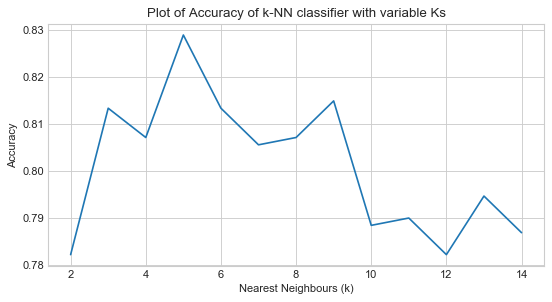

In [20]:
## (a)
# create an empty data frame to add values of output from do_cv_class function for plotting chart
accDataFrame = pd.DataFrame(columns=['Accuracy', 'Nearest Neighbours']) 

# run k-NN for different values of k
for i in range (2, 15):
    resultingDataFrame = do_cv_class(df, 10, str(i) +'nn')
    scoreTable = get_metrics(resultingDataFrame.iloc[:,:-1])
    acc = scoreTable.at[0, 'acc']
    accDataFrame.loc[i - 2] = [acc, int(i)]

# create a line plot
figure(num=None, figsize=(8, 4), dpi=80, facecolor='w', edgecolor='k')

plt.style.use('seaborn-whitegrid')
plt.plot(accDataFrame.iloc[:,1], accDataFrame.iloc[:,0])
plt.xlabel('Nearest Neighbours (k)')
plt.ylabel('Accuracy')
plt.title('Plot of Accuracy of k-NN classifier with variable Ks')
plt.show()

In [16]:
## The number of k is 5 which yields the highest accuracy (~83%) for k-NN Classifier. 
## Where k < 5, the model is being underfitted
## Where k > 5, the model is being overfitted

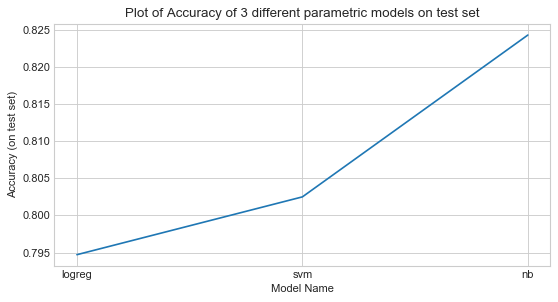

The accuracy of default classifier is [0.56454121]


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


In [17]:
# create a chart for visualizing the results
figure(num=None, figsize=(8, 4), dpi=80, facecolor='w', edgecolor='k')

plt.style.use('seaborn-whitegrid')
plt.plot(comapre3Models.iloc[:,1], comapre3Models.iloc[:,0])

plt.xlabel('Model Name')
plt.xticks = models
plt.ylabel('Accuracy (on test set)')
plt.title('Plot of Accuracy of 3 different parametric models on test set')
plt.show()

# Calculating accuracy of Default Classifier
majorityClass = mode(df.iloc[:,-1])
print ("The accuracy of default classifier is " + str((majorityClass.count) / (len(df.iloc[:,-1]))))

In [18]:
## Naive Bayes has the highest accuracy on test of approximately 82%
## The accuracy of default classifier is 56.4% for this data

In [19]:
## (c)
## The best classifier model on this data is Naive Bayes. It produces the highest accuracy of 82% on test set with
## 10 fold cross validation. This is followed by svm and logreg amongst the parametrics models. 
## We also find out that as the number of k in k-Nearest Neighbours goes below 5, the model tends to underfit data
## As k goes above 5, the model seems to overfit the data. k = 5 is the optimal for k-NN classifier for this fata.
## All 4 classifiers, logreg, naive bayes, svm and k-nn perform better than the default classifier which gives accuracy of
## 56.4% 